<a href="https://colab.research.google.com/github/saravanan0195/IMBD-250-moives/blob/main/IMDb_Top_250_Movies.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **IMDb Top 250 Movies**

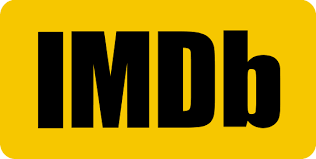

**Context :**

IMDb (Internet Movie Database) is one of the largest online databases for movies and television shows. It provides comprehensive information about movies such as ratings and reviews from its vast user base. The IMDb ratings are widely used as a benchmark for the popularity and success of movies.

This dataset contains top 250 rated movies on IMDb of the year 2021, providing a snapshot of the most popular and highly rated movies of recent times.
Analysis of this dataset provides insights into the movie industry, such as trends in movie ratings and popular genres.

The data was scraped from the IMDb website for educational purposes and is available Kaggle.


**Column Description :**

There 13 number of coulumns that are used to extract the insights regarding each of them.

*rank* - Rank of the movie.

*name* - Name of the movie.

*year* - Release year.

*rating* - Rating of the movie.

*genre* - Genre of the movie.

*certificate* - Certificate of the movie.

*run_time* - Total movie run time.

*tagline* - Tagline of the movie.

*budget* - Budget of the movie.

*box_office* - Total box office collection across the world.

*casts* - All casts of the movie.

*directors* - Director of the movie.

*writers* - Writer of the movie.


This data set helps in exploring and understanding the factors that contribute to a movie's popularity and success.

Hope this dataset will be useful for movie enthusiasts, data scientists, and researchers who are interested in exploring the correlations between different movie attributes and their popularity.

### **Importing Libraries :**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import gc

In [ ]:
data1=pd.read_csv('/content/IMDB Top 250 Movies.csv')

### **Basic Investigation :**

In [ ]:
data1.shape

(250, 13)

In [ ]:
data1.columns

Index(['rank', 'name', 'year', 'rating', 'genre', 'certificate', 'run_time',
       'tagline', 'budget', 'box_office', 'casts', 'directors', 'writers'],
      dtype='object')

In [ ]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   rank         250 non-null    int64  
 1   name         250 non-null    object 
 2   year         250 non-null    int64  
 3   rating       250 non-null    float64
 4   genre        250 non-null    object 
 5   certificate  250 non-null    object 
 6   run_time     250 non-null    object 
 7   tagline      250 non-null    object 
 8   budget       250 non-null    object 
 9   box_office   250 non-null    object 
 10  casts        250 non-null    object 
 11  directors    250 non-null    object 
 12  writers      250 non-null    object 
dtypes: float64(1), int64(2), object(10)
memory usage: 25.5+ KB


In [ ]:
data1.describe()

,rank,year,rating
count,250.000000,250.000000,250.000000
mean,125.500000,1986.360000,8.307200
std,72.312977,25.125356,0.229081
min,1.000000,1921.000000,8.000000
25%,63.250000,1966.250000,8.100000
50%,125.500000,1994.000000,8.200000
75%,187.750000,2006.000000,8.400000
max,250.000000,2022.000000,9.300000


In [ ]:
data1.nunique()

rank           250
name           250
year            86
rating          13
genre          104
certificate     15
run_time       102
tagline        250
budget         128
box_office     221
casts          250
directors      160
writers        233
dtype: int64

In [ ]:
data1.isnull().any()

rank           False
name           False
year           False
rating         False
genre          False
certificate    False
run_time       False
tagline        False
budget         False
box_office     False
casts          False
directors      False
writers        False
dtype: bool

In [ ]:
data1.isnull().sum()

rank           0
name           0
year           0
rating         0
genre          0
certificate    0
run_time       0
tagline        0
budget         0
box_office     0
casts          0
directors      0
writers        0
dtype: int64

In [ ]:
data1.head()

,rank,name,year,rating,genre,certificate,run_time,tagline,budget,box_office,casts,directors,writers
0,1,The Shawshank Redemption,1994,9.3,Drama,R,2h 22m,Fear can hold you prisoner. Hope can set you f...,25000000,28884504,"Tim Robbins,Morgan Freeman,Bob Gunton,William ...",Frank Darabont,"Stephen King,Frank Darabont"
1,2,The Godfather,1972,9.2,"Crime,Drama",R,2h 55m,An offer you can't refuse.,6000000,250341816,"Marlon Brando,Al Pacino,James Caan,Diane Keato...",Francis Ford Coppola,"Mario Puzo,Francis Ford Coppola"
2,3,The Dark Knight,2008,9.0,"Action,Crime,Drama",PG-13,2h 32m,Why So Serious?,185000000,1006234167,"Christian Bale,Heath Ledger,Aaron Eckhart,Mich...",Christopher Nolan,"Jonathan Nolan,Christopher Nolan,David S. Goyer"
3,4,The Godfather Part II,1974,9.0,"Crime,Drama",R,3h 22m,All the power on earth can't change destiny.,13000000,47961919,"Al Pacino,Robert De Niro,Robert Duvall,Diane K...",Francis Ford Coppola,"Francis Ford Coppola,Mario Puzo"
4,5,12 Angry Men,1957,9.0,"Crime,Drama",Approved,1h 36m,Life Is In Their Hands -- Death Is On Their Mi...,350000,955,"Henry Fonda,Lee J. Cobb,Martin Balsam,John Fie...",Sidney Lumet,Reginald Rose


## **Feature Engineering And Exploratory Data Analysis:**

### **Convert budget and box_office columns into monetary values.**

In [ ]:
data1['budget'] = data1['budget'].str.replace('$','')
data1['budget']=pd.to_numeric(data1['budget'],errors='coerce', downcast='float') / 1E9 # Convert to billions
data1['budget'] = data1['budget'].fillna(data1['budget'].median())

data1['box_office'] = data1['box_office'].str.replace('$','')
data1['box_office']=pd.to_numeric(data1['box_office'],errors='coerce', downcast='float') / 1E9 # Convert to billions
data1['box_office'] = data1['box_office'].fillna(data1['box_office'].median())

data1['return_rate'] = data1['box_office'] / data1set_style(df.describe(), "Numerical Data Description")['budget'] * 100

<ipython-input-80-2878684184e2>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data1['budget'] = data1['budget'].str.replace('$','')
<ipython-input-80-2878684184e2>:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data1['box_office'] = data1['box_office'].str.replace('$','')


In [ ]:
data1[data1['budget'] > 2]

,rank,name,year,rating,genre,certificate,run_time,tagline,budget,box_office,casts,directors,writers,return_rate
78,79,Princess Mononoke,1997,8.4,"Animation,Action,Adventure",PG-13,2h 14m,Live on.,2.4,0.170006,"Yôji Matsuda,Yuriko Ishida,Yûko Tanaka,Billy C...",Hayao Miyazaki,"Hayao Miyazaki,Neil Gaiman",7.083578


There's a budjet outlier for the film 'Princess Mononoke' where it can be fixed to median to resolve the issue ;

In [ ]:
data1.loc[data1.name == 'Princess Mononoke', 'budget'] = data1['budget'].median()
data1.loc[data1.name == 'Princess Mononoke', 'box_office'] = data1['box_office'].median()

### **Finding out any 'Not Available' columns :**

In [ ]:
missing = (data1 == "Not Available").any().sum()

print(f"{missing} columns in the dataset contain 'Not Available'.")

2 columns in the dataset contain 'Not Available'.


In [ ]:
not_available_columns = []
for col in data1.columns:
    if 'Not Available' in data1[col].value_counts().index:
        not_avail_count = data1[col].value_counts()['Not Available']
        print(f"Column '{col}' has {not_avail_count} 'Not Available' values.")
        not_available_columns.append(col)

print(f"\nThere are {len(not_available_columns)} columns with 'Not Available' values: {not_available_columns}")

Column 'certificate' has 1 'Not Available' values.
Column 'run_time' has 1 'Not Available' values.

There are 2 columns with 'Not Available' values: ['certificate', 'run_time']


Text(0.5, 1.0, 'Movie duration as per years')

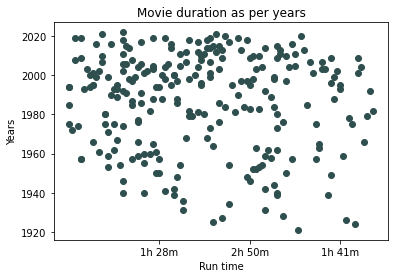

In [ ]:
x=data1['run_time']
y=data1['year']
a=[30, 60, 90, 120, 150]
plt.xticks(a)
plt.scatter(x,y,color='darkslategrey')
plt.xlabel('Run time')
plt.ylabel('Years')
plt.title('Movie duration as per years')

In [ ]:
df = pd.DataFrame(data1)

print(df['rating'].unique())

[9.3 9.2 9.  8.9 8.8 8.7 8.6 8.5 8.4 8.3 8.2 8.1 8. ]


In [ ]:
genre_counts = data1['genre'].value_counts()

# The Top 10 most common genres
display(genre_counts.head(10))

Drama                         19
Crime,Drama                   14
Animation,Adventure,Comedy    10
Biography,Drama,History        9
Crime,Drama,Mystery            9
Drama,War                      8
Drama,Romance                  6
Crime,Drama,Thriller           5
Action,Crime,Drama             5
Action,Adventure,Drama         5
Name: genre, dtype: int64

In [ ]:
real_gen = ""
for i in data1['genre']:
    real_gen = real_gen+","+i
all_gen = real_gen.split(',')[1:]
unique_genres = list(set(all_gen))

In [ ]:
data = []
for i in unique_genres:
    c = 0
    for j in df['genre']:
        if i in j:
            c+=1
    data.append([i, c])

In [ ]:
gen_data1 = pd.DataFrame(data, columns=['Genre', 'Freq'])
gen_data1.sort_values(by = 'Freq', ascending = False, inplace = True)
gen_data1 = gen_data1.head(5)

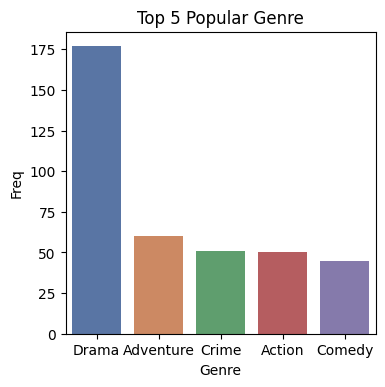

In [ ]:
plt.figure(figsize=(4,4),dpi=100)
sns.barplot(data = gen_data1, x = 'Genre', y = 'Freq', palette='deep')
plt.title('Top 5 Popular Genre')
plt.show()

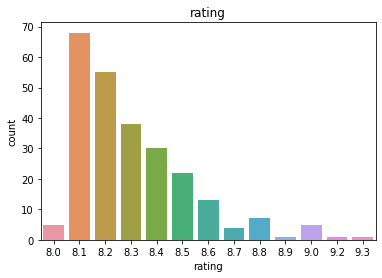

In [ ]:
sns.countplot(x=data1["rating"])
plt.title("rating")
plt.show()

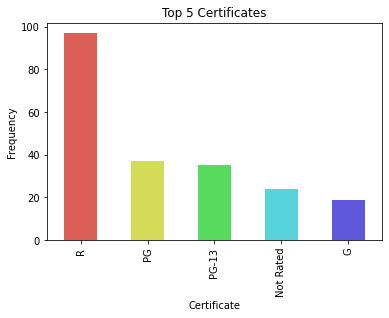

<Figure size 1008x504 with 0 Axes>

In [ ]:
data1.groupby('certificate').size().sort_values(ascending=False).head(5).plot(kind = 'bar', color = sns.color_palette('hls'))
plt.xlabel('Certificate')
plt.ylabel('Frequency')
plt.title("Top 5 Certificates")
plt.figure(figsize=(14,7))
plt.show()

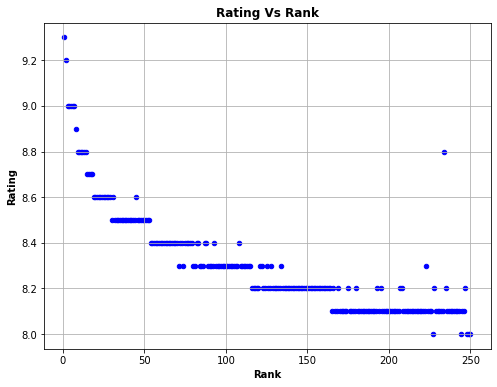

In [ ]:
ax = data1.plot.scatter(x='rank', y='rating', color='blue')
ax.figure.set_size_inches(8,6)
ax.set_title("Rating Vs Rank", weight='bold')
ax.yaxis.grid()
ax.xaxis.grid()
plt.ylabel('Rating', weight='bold')
plt.xlabel('Rank', weight='bold')
plt.show()

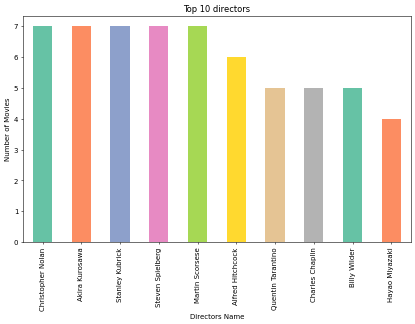

In [ ]:
plt.figure(figsize=(10,6),dpi=50)
data1.groupby('directors').size().sort_values(ascending=False).head(10).plot(kind = 'bar', color = sns.color_palette('Set2'))
plt.xlabel("Directors Name")
plt.ylabel("Number of Movies")
plt.title("Top 10 directors")
plt.show()


## **Summary of findings :**

---



*  **Christopher Nolan** is in Top 1 position out of 160 directors
who directed the highest number of films recorded in IMDb top 250 Movies.


* Each movie has its own unique **name**, **rank** and **tagline**.

* Rank and ratings are **negatively correlated**.

* Certain **directors** and **writers** have been involved in multiple films.

* **R and G** are the highest and least frequently provided certificates respectively to the top 250 IMDb films.

* Approaximately 68% of the films are given a rating of **8.1**.

* The top 5 popular **genres** of the films are as follows :

    1. Drama

    2.Adventure

    3.Crime

    4.Action

    5.Comedy

* Movie Duration of the films has been **increasing** over the period of time since 1920 to 2020.
* 1990 to 2010 were a couple of decades for top movie production and huge budget spending.